https://www.kaggle.com/davidcairuz/feature-engineering-lightgbm

In [15]:
import os
import platform

import pandas as pd
pd.options.display.max_columns = None

import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score
import gc

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
print(platform.system())
if platform.system() == 'Darwin':
    path = "/Volumes/Buffalo-SSD/Kaggle_Datasets/Kaggle_IEEE_FraudDetection/input/"
elif platform.system() == 'Windows':
    path = "D:/Kaggle_Datasets/Kaggle_IEEE_FraudDetection/input/"

Darwin


In [12]:
%%time
os.listdir(path)

CPU times: user 172 µs, sys: 262 µs, total: 434 µs
Wall time: 248 µs


['train_upsampled_all.csv',
 'val_data.csv',
 'test_feature1.csv',
 'train_downsampled.csv',
 'train_downsampled_all.csv',
 'train_feature1.csv',
 'train_ros.csv',
 'train_rus.csv',
 'train_tl.csv',
 'train_upsampled.csv']

In [13]:
%%time
train = pd.read_csv(f'{path}train_tl.csv')

CPU times: user 18.3 s, sys: 2.11 s, total: 20.4 s
Wall time: 20.1 s


In [14]:
test = pd.read_csv(f'{path}test_feature1.csv')

In [23]:
train.shape

(584134, 339)

In [16]:
train.head()

,Unnamed: 0,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V17,V19,V20,V29,V30,V33,V34,V35,V36,V37,V38,V40,V44,V45,V46,V47,V48,V49,V51,V52,V53,V54,V56,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V143,V145,V146,V147,V149,V150,V151,V152,V154,V156,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V169,V170,V171,V172,V173,V175,V176,V177,V178,V180,V182,V184,V187,V188,V189,V195,V197,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V212,V213,V214,V215,V216,V217,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V231,V233,V234,V238,V239,V242,V243,V244,V245,V246,V247,V249,V251,V253,V256,V257,V258,V259,V261,V262,V263,V264,V265,V266,V267,V268,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V326,V329,V331,V332,V333,V335,V336,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_11,id_12,id_13,id_14,id_15,id_17,id_19,id_20,id_30,id_31,id_32,id_33,id_36,id_37,id_38,DeviceType,DeviceInfo,device_name,device_version,OS_id_30,version_id_30,browser_id_31,version_id_31,screen_width,screen_height,had_id,TransactionAmt_to_mean_card1,TransactionAmt_to_std_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_addr1,id_02_to_mean_card1,id_02_to_std_card1,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1,TransactionAmt_Log,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour,id_02__id_20,id_02__D8,D11__DeviceInfo,DeviceInfo__P_emaildomain,P_emaildomain__C2,card2__dist1,card1__card5,card2__id_20,card5__P_emaildomain,addr1__card1,card1_count_full,card2_count_full,card3_count_full,card4_count_full,card5_count_full,card6_count_full,id_36_count_full,id_01_count_dist,id_31_count_dist,id_33_count_dist,id_36_count_dist,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,isFraud
0,0,2987000.0,86400.0,68.5,4.0,13926.0,NaN,150.0,1.0,142.0,1.0,315.0,87.0,19.0,32.0,32.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,86.0,136.0,NaN,461.0,2.0,2.0,2.0,2.0,2740.0,13.0,380.0,6.0,49.0,31.0,43.0,247.0,216.0,NaN,0.1946,0.184566,0.2578,0.1703,0.5100,0.286941,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000,0.000,0.0000,0.000,0.000000,4.227,500.0,0.0,0.0,270749.0,259912.0,42.0,8523.0,4686.0,31072.0,4648.0,9239.0,508.0,29248.0,56.0,17587.0,956845.0,9524.0,309.0,267648.0,819269.0,446307.0,450258.0,517251.0,449555.0,6.0,6.0,6.0,6.0,0
1,1,2987001.0,86401.0,29.0,4.0,2755.0,404.0,150.0,2.0,102.0,1.0,325.0,87.0

In [20]:
test.shape

(506691, 337)

In [21]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V17,V19,V20,V29,V30,V33,V34,V35,V36,V37,V38,V40,V44,V45,V46,V47,V48,V49,V51,V52,V53,V54,V56,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V143,V145,V146,V147,V149,V150,V151,V152,V154,V156,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V169,V170,V171,V172,V173,V175,V176,V177,V178,V180,V182,V184,V187,V188,V189,V195,V197,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V212,V213,V214,V215,V216,V217,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V231,V233,V234,V238,V239,V242,V243,V244,V245,V246,V247,V249,V251,V253,V256,V257,V258,V259,V261,V262,V263,V264,V265,V266,V267,V268,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V326,V329,V331,V332,V333,V335,V336,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_11,id_12,id_13,id_14,id_15,id_17,id_19,id_20,id_30,id_31,id_32,id_33,id_36,id_37,id_38,DeviceType,DeviceInfo,device_name,device_version,OS_id_30,version_id_30,browser_id_31,version_id_31,screen_width,screen_height,had_id,TransactionAmt_to_mean_card1,TransactionAmt_to_std_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_addr1,id_02_to_mean_card1,id_02_to_std_card1,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1,TransactionAmt_Log,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour,id_02__id_20,id_02__D8,D11__DeviceInfo,DeviceInfo__P_emaildomain,P_emaildomain__C2,card2__dist1,card1__card5,card2__id_20,card5__P_emaildomain,addr1__card1,card1_count_full,card2_count_full,card3_count_full,card4_count_full,card5_count_full,card6_count_full,id_36_count_full,id_01_count_dist,id_31_count_dist,id_33_count_dist,id_36_count_dist,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,3663549,18403224,31.95,4,10409,111.0,150.0,4,226.0,2,170.0,87.0,1.0,16,32,6.0,6.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,1,0,3,2,0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,47.95,0.00,47.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,47.95,0.00,47.95,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,86,136,NaN,461,2,2,2,2,2740,13,380,6,49,31,43,247,216,NaN,0.3394,0.260350,0.2373,0.1299,0.2123,0.124811,NaN,NaN,NaN,NaN,NaN,NaN,1.0660,1.665603,1.9260,1.50200,1.5580,1.450810,3.465,949,2.0,0.0,270749,259912,124,8507,2401,807,482,372,1375,5275,150,82537,956845,719649,553537,824959,819269,364784,370066,436020,369714,4,0,6,6
1,3663550,18403263,49.00,4,4272,111.0,150.0,4,226.0,2,299.0,87.0,4.0,2,32,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,634.0,NaN,NaN

In [22]:
X = train.sort_values('TransactionDT').drop(['Unnamed: 0', 'TransactionID', 'isFraud', 'TransactionDT'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']

X_test = test.drop(['TransactionID', 'TransactionDT'], axis=1)

gc.collect()

15

In [23]:
print(X.shape)
X.head()

(584134, 335)


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V17,V19,V20,V29,V30,V33,V34,V35,V36,V37,V38,V40,V44,V45,V46,V47,V48,V49,V51,V52,V53,V54,V56,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V143,V145,V146,V147,V149,V150,V151,V152,V154,V156,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V169,V170,V171,V172,V173,V175,V176,V177,V178,V180,V182,V184,V187,V188,V189,V195,V197,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V212,V213,V214,V215,V216,V217,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V231,V233,V234,V238,V239,V242,V243,V244,V245,V246,V247,V249,V251,V253,V256,V257,V258,V259,V261,V262,V263,V264,V265,V266,V267,V268,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V326,V329,V331,V332,V333,V335,V336,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_11,id_12,id_13,id_14,id_15,id_17,id_19,id_20,id_30,id_31,id_32,id_33,id_36,id_37,id_38,DeviceType,DeviceInfo,device_name,device_version,OS_id_30,version_id_30,browser_id_31,version_id_31,screen_width,screen_height,had_id,TransactionAmt_to_mean_card1,TransactionAmt_to_std_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_addr1,id_02_to_mean_card1,id_02_to_std_card1,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1,TransactionAmt_Log,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour,id_02__id_20,id_02__D8,D11__DeviceInfo,DeviceInfo__P_emaildomain,P_emaildomain__C2,card2__dist1,card1__card5,card2__id_20,card5__P_emaildomain,addr1__card1,card1_count_full,card2_count_full,card3_count_full,card4_count_full,card5_count_full,card6_count_full,id_36_count_full,id_01_count_dist,id_31_count_dist,id_33_count_dist,id_36_count_dist,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,68.5,4.0,13926.0,NaN,150.0,1.0,142.0,1.0,315.0,87.0,19.0,32.0,32.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,86.0,136.0,NaN,461.0,2.0,2.0,2.0,2.0,2740.0,13.0,380.0,6.0,49.0,31.0,43.0,247.0,216.0,NaN,0.1946,0.184566,0.2578,0.1703,0.5100,0.286941,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.000000,0.000,0.0000,0.000,0.000000,4.227,500.0,0.0,0.0,270749.0,259912.0,42.0,8523.0,4686.0,31072.0,4648.0,9239.0,508.0,29248.0,56.0,17587.0,956845.0,9524.0,309.0,267648.0,819269.0,446307.0,450258.0,517251.0,449555.0,6.0,6.0,6.0,6.0
1,29.0,4.0,2755.0,404.0,150.0,2.0,102.0,1.0,325.0,87.0,NaN,16.0,32.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,Na

In [24]:
print(X_test.shape)
X_test.head()

(506691, 335)


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M2,M3,M4,M5,M6,M7,M8,M9,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V17,V19,V20,V29,V30,V33,V34,V35,V36,V37,V38,V40,V44,V45,V46,V47,V48,V49,V51,V52,V53,V54,V56,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V143,V145,V146,V147,V149,V150,V151,V152,V154,V156,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V169,V170,V171,V172,V173,V175,V176,V177,V178,V180,V182,V184,V187,V188,V189,V195,V197,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V212,V213,V214,V215,V216,V217,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V231,V233,V234,V238,V239,V242,V243,V244,V245,V246,V247,V249,V251,V253,V256,V257,V258,V259,V261,V262,V263,V264,V265,V266,V267,V268,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V326,V329,V331,V332,V333,V335,V336,V338,id_01,id_02,id_03,id_05,id_06,id_09,id_11,id_12,id_13,id_14,id_15,id_17,id_19,id_20,id_30,id_31,id_32,id_33,id_36,id_37,id_38,DeviceType,DeviceInfo,device_name,device_version,OS_id_30,version_id_30,browser_id_31,version_id_31,screen_width,screen_height,had_id,TransactionAmt_to_mean_card1,TransactionAmt_to_std_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card4,TransactionAmt_to_mean_addr1,TransactionAmt_to_std_addr1,id_02_to_mean_card1,id_02_to_std_card1,id_02_to_mean_card4,id_02_to_std_card4,id_02_to_mean_addr1,id_02_to_std_addr1,D15_to_mean_card1,D15_to_std_card1,D15_to_mean_card4,D15_to_std_card4,D15_to_mean_addr1,D15_to_std_addr1,TransactionAmt_Log,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour,id_02__id_20,id_02__D8,D11__DeviceInfo,DeviceInfo__P_emaildomain,P_emaildomain__C2,card2__dist1,card1__card5,card2__id_20,card5__P_emaildomain,addr1__card1,card1_count_full,card2_count_full,card3_count_full,card4_count_full,card5_count_full,card6_count_full,id_36_count_full,id_01_count_dist,id_31_count_dist,id_33_count_dist,id_36_count_dist,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,31.95,4,10409,111.0,150.0,4,226.0,2,170.0,87.0,1.0,16,32,6.0,6.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,1,0,3,2,0,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,47.95,0.00,47.95,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,47.95,0.00,47.95,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,86,136,NaN,461,2,2,2,2,2740,13,380,6,49,31,43,247,216,NaN,0.3394,0.260350,0.2373,0.1299,0.2123,0.124811,NaN,NaN,NaN,NaN,NaN,NaN,1.0660,1.665603,1.9260,1.50200,1.5580,1.450810,3.465,949,2.0,0.0,270749,259912,124,8507,2401,807,482,372,1375,5275,150,82537,956845,719649,553537,824959,819269,364784,370066,436020,369714,4,0,6,6
1,49.00,4,4272,111.0,150.0,4,226.0,2,299.0,87.0,4.0,2,32,3.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,0,0,0,2,0,2,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0

In [27]:
time_siries = ['Transaction_day_of_week', 'Transaction_hour']
X[time_siries] = np.cos(X[time_siries])
X_test[time_siries] = np.cos(X_test[time_siries])

In [28]:
del(train, test)

In [29]:
from sklearn.model_selection import KFold
import lightgbm as lgb

In [30]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
         }

In [31]:
%%time

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)

columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf.predict(X_test) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training until validation scores don't improve for 500 rounds.
[200]	training's auc: 0.957063	valid_1's auc: 0.890863
[400]	training's auc: 0.977723	valid_1's auc: 0.904322
[600]	training's auc: 0.989324	valid_1's auc: 0.912192
[800]	training's auc: 0.994983	valid_1's auc: 0.917183
[1000]	training's auc: 0.997651	valid_1's auc: 0.919825
[1200]	training's auc: 0.998912	valid_1's auc: 0.921185
[1400]	training's auc: 0.99948	valid_1's auc: 0.921714
[1600]	training's auc: 0.999756	valid_1's auc: 0.921886
[1800]	training's auc: 0.999888	valid_1's auc: 0.92205
[2000]	training's auc: 0.999952	valid_1's auc: 0.922108
[2200]	training's auc: 0.99998	valid_1's auc: 0.922292
[2400]	training's auc: 0.999991	valid_1's auc: 0.92245
[2600]	training's auc: 0.999996	valid_1's auc: 0.922702
[2800]	training's auc: 0.999999	valid_1's auc: 0.922859
[3000]	training's auc: 0.999999	valid_1's auc: 0.922953
[3200]	training's auc: 1	valid_1's auc: 0.922928
[3400]	training's auc: 1	valid_1's auc: 0.922975
[3600]	

In [34]:
sub = pd.read_csv(f'{path}sample_submission.csv')

In [35]:
sub['isFraud'] = y_preds
sub.to_csv("feature2_CosTransform_downsampled_tl.csv", index=False)

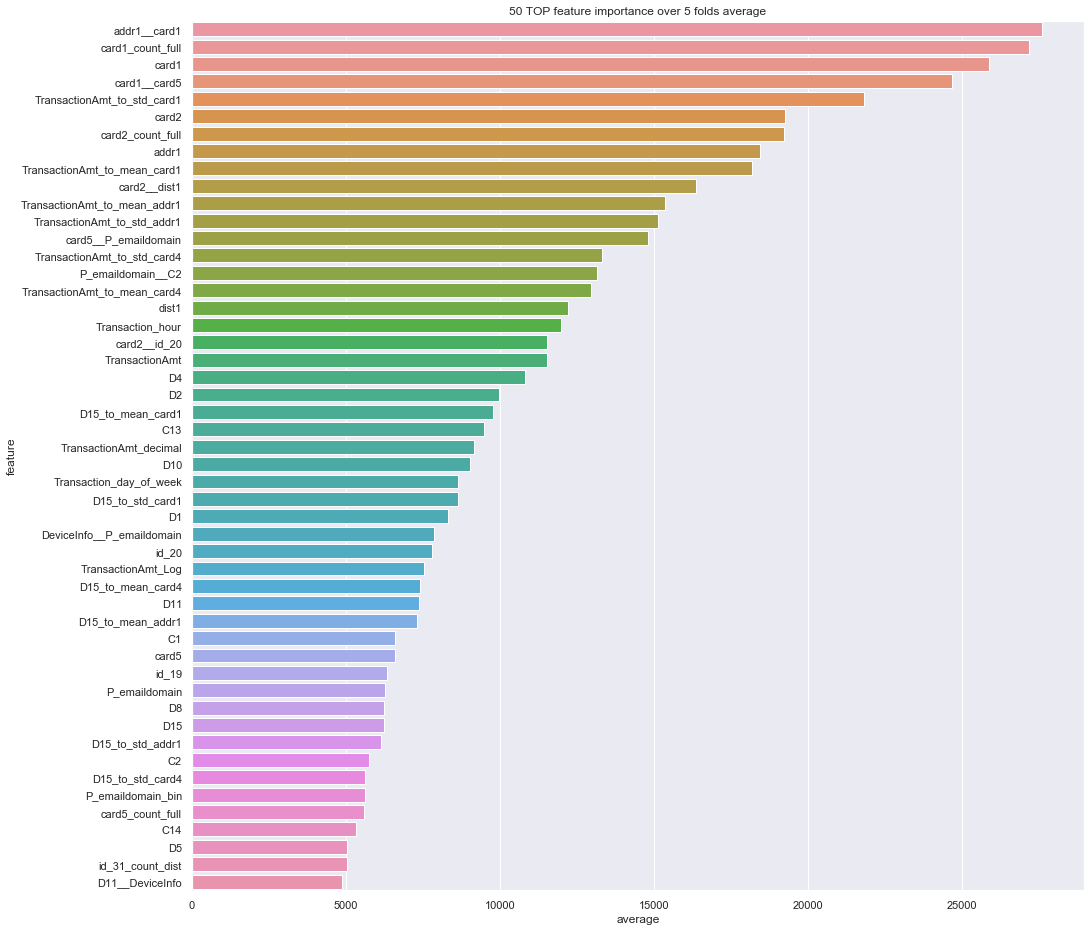

In [36]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature2_CosTransform_sampled_importances_tl.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [37]:
feature_importances.sort_values(by='average', ascending=False).head(50)

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,average
319,addr1__card1,57431,23179,17929,21696,17678,27582.6
320,card1_count_full,56425,23128,17514,21128,17631,27165.2
2,card1,52846,22797,17058,20147,16565,25882.6
316,card1__card5,50793,21403,16087,19435,15646,24672.8
289,TransactionAmt_to_std_card1,50707,17898,12433,16394,11657,21817.8
3,card2,40196,16838,12473,14930,11867,19260.8
321,card2_count_full,38740,16544,12778,15512,12506,19216.0
8,addr1,36461,16123,12278,14948,12386,18439.2
288,TransactionAmt_to_mean_card1,43280,14920,9933,13224,9590,18189.4
315,card2__dist1,33817,13890,10637,12793,10600,16347.4
